# Creating statistics of street designations 

## Load libraries and data

In [2]:
import pandas as pd 
import geopandas 
import datashader as ds
import colorcet as cc
import matplotlib.pyplot as plt
import plotly.express as px
import time
import seaborn as sns
import warnings

%matplotlib inline

<font color='red'>WARNING</font> streets_geom (pure_line.geojson) file is 450 MByte and takes a couple of min to load

In [3]:
%%time

# Generic treet name designations
streetnames = pd.read_csv('../Datapreparation/streetnames.csv', encoding='UTF-8-SIG', sep=';')

# Specific street name designations
streetnames_s = pd.read_csv('../Modeling/out_mapping.csv', encoding='UTF-8-SIG', sep=';', low_memory=False)

# Street name geometries
streets_geom = geopandas.read_file('data/pure_line.geojson')

# Communes data
com = pd.read_csv('data/gmde_info.csv', encoding='UTF-8-SIG', sep=';')

# Communes geometries
com_geom = geopandas.read_file('data/gemeinden.geojson')

CPU times: total: 2min 6s
Wall time: 2min 10s


In [4]:
# Remove Italian and Romanisch Street Names for specific street name designation analysis
streetnames_s_de_fr = streetnames_s.dropna(subset=["STR_ESID_WIKI"])

Merge all datasets

In [5]:
merge_classif = streetnames[['STR_ESID','COM_FOSNR','COM_CANTON','STR_EASTING','STR_NORTHING', 'STR_TERMS', 'STR_PREPS',
                    'STN_LABEL_FINAL']].merge(streetnames_s[['STR_ESID','classif']], on=['STR_ESID'], how='inner')

merge_classif_de_fr = streetnames[['STR_ESID','COM_FOSNR','COM_CANTON','STR_EASTING','STR_NORTHING', 'STR_TERMS', 'STR_PREPS',
                    'STN_LABEL_FINAL']].merge(streetnames_s_de_fr[['STR_ESID','classif']], on=['STR_ESID'], how='inner')

In [6]:
merge_all = merge_classif[['STR_ESID','COM_FOSNR','COM_CANTON','STR_EASTING','STR_NORTHING', 'STR_TERMS', 'STR_PREPS',
                    'STN_LABEL_FINAL', 'classif']].merge(streets_geom[['STR_ESID','LENGTH']], on=['STR_ESID'], how='inner')

merge_all_de_fr = merge_classif_de_fr[['STR_ESID','COM_FOSNR','COM_CANTON','STR_EASTING','STR_NORTHING', 'STR_TERMS', 'STR_PREPS',
                    'STN_LABEL_FINAL', 'classif']].merge(streets_geom[['STR_ESID','LENGTH']], on=['STR_ESID'], how='inner')

## Plot points

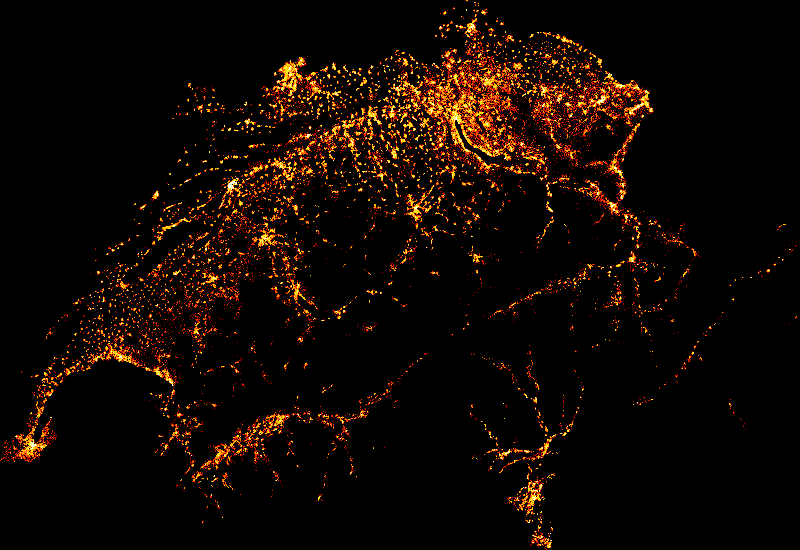

In [7]:
agg = ds.Canvas(plot_width=800, plot_height=550).points(merge_all, 'STR_EASTING', 'STR_NORTHING')
ds.tf.set_background(ds.tf.shade(agg, cmap=cc.fire), "black")


#add title and better size

## Statistics 

### Generic street designations 

In [8]:
from wordcloud import WordCloud

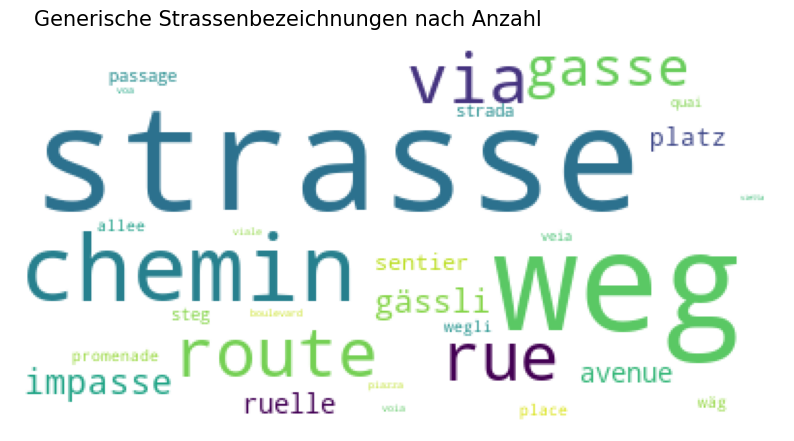

In [9]:
dct = merge_all.groupby(['STR_TERMS']).size()
#del dct['Andere']
plt.figure(figsize=(10,7))
wordcloud = WordCloud(background_color='white',
prefer_horizontal=1).generate_from_frequencies(dct)
plt.text(x=12, y=-10, s='Generische Strassenbezeichnungen nach Anzahl', fontsize=15)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

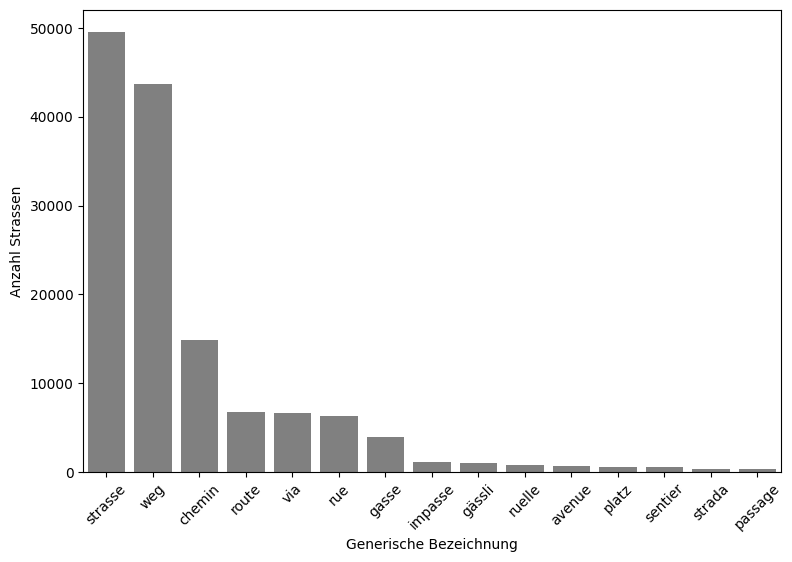

In [58]:
dct = merge_all.groupby(['STR_TERMS']).count().reset_index().sort_values(by=['STR_ESID'], ascending=False).head(15)
plt.figure(figsize=(9,6))
sns.barplot(data=dct, x="STR_TERMS", y="STR_ESID", color = 'grey')
plt.xlabel("Generische Bezeichnung")
plt.xticks(rotation=45)
plt.ylabel("Anzahl Strassen")
plt.show()

In [55]:
merge_all.groupby(['STR_TERMS']).count().reset_index().sort_values(by=['STR_ESID'], ascending=False).head(40)

,STR_TERMS,STR_ESID,COM_FOSNR,COM_CANTON,STR_EASTING,STR_NORTHING,STR_PREPS,STN_LABEL_FINAL,classif,LENGTH
19,strasse,49563,49563,49563,49563,49563,2089,49464,49563,49563
26,weg,43729,43729,43729,43729,43729,1305,43689,43729,43729
3,chemin,14824,14824,14824,14824,14824,523,14820,14824,14824
13,route,6782,6782,6782,6782,6782,203,6777,6782,6782
21,via,6687,6687,6687,6687,6687,180,6685,6687,6687
14,rue,6270,6270,6270,6270,6270,298,6264,6270,6270
4,gasse,3915,3915,3915,3915,3915,125,3891,3915,3915
6,impasse,1149,1149,1149,1149,1149,32,1147,1149,1149
5,gässli,1062,1062,1062,1062,1062,9,885,1062,1062
15,ruelle,734,734,734,734,734,34,687,734,734


In [59]:
merge_all

,STR_ESID,COM_FOSNR,COM_CANTON,STR_EASTING,STR_NORTHING,STR_TERMS,STR_PREPS,STN_LABEL_FINAL,classif,LENGTH
0,10023770,2786,BL,2610733.0,1254311.0,weg,NaN,Wieden,Andere,151.673319
1,10179192,2788,BL,2598709.0,1249640.0,NaN,NaN,Wuhrbärgli,Natur,142.875026
2,10140563,2829,BL,2623078.0,1257558.0,weg,NaN,Emanuelen,Andere,205.258129
3,10069457,2850,BL,2630229.0,1251411.0,weg,NaN,Löhr,Person,141.676812
4,10096235,2833,BL,2621406.0,1256852.0,gasse,NaN,Brunn,Andere,325.942182
...,...,...,...,...,...,...,...,...,...,...
172710,10107114,4471,TG,2736565.0,1261881.0,strasse,NaN,Tannen,Ortschaft,174.421463
172711,10070806,4724,TG,2716120.0,1258548.0,strasse,NaN,Reben,Lebewesen,428.366721
172712,10142291,4864,TG,2715726.0,1280124.0,strasse,NaN,Fritz Gegauf,Person,156.977259
172713,10093237,4571,TG,2705606.0,1266777.0,NaN,ober,Bleichewiese,Natur,309.977876


In [24]:
dct = merge_all.groupby(['classif']).size()
del dct['Andere']
dct

classif
Berg          7402
Beruf         1687
Gewässer      4938
Lebewesen    10532
Natur        30377
Ortschaft    14180
Person       12879
Religion      3178
Siedlung     17827
dtype: int64

<AxesSubplot: xlabel='LENGTH', ylabel='STR_TERMS'>

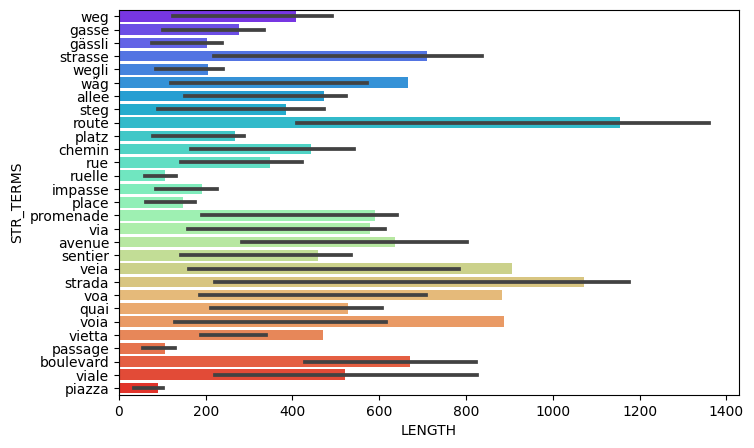

In [60]:
plt.figure(figsize=(8,5))
sns.barplot(x='LENGTH',y='STR_TERMS',data=merge_all, palette='rainbow', estimator = 'mean', errorbar=('pi', 50))

### Specific street designations 

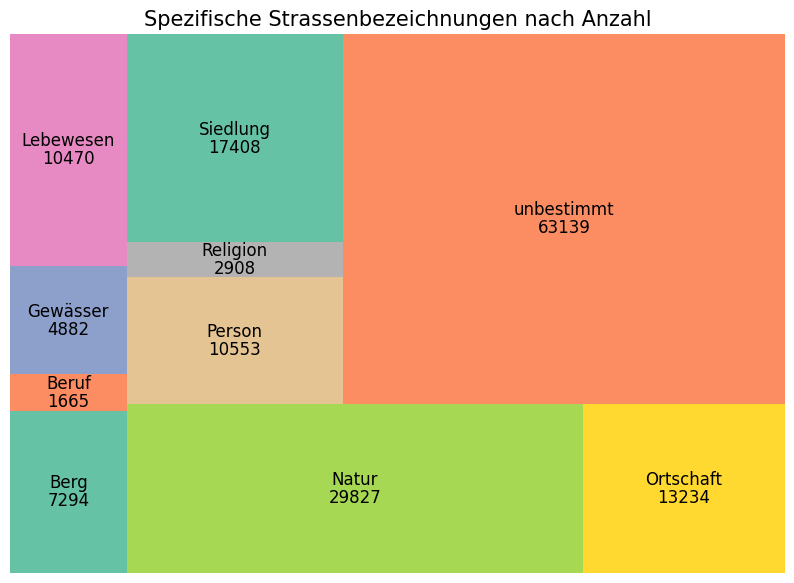

In [111]:
import squarify
import matplotlib

merge_all_de_fr.loc[merge_all_de_fr['classif'] == 'Andere', 'classif'] = 'unbestimmt'
dct = merge_all_de_fr.groupby(['classif']).size()
plt.figure(figsize=(10,7))

squarify.plot(sizes=dct, label=dct.index, value=dct,
              color=[matplotlib.cm.Set2(i) for i in range(8)],
              text_kwargs={'fontsize': 12})

plt.title('Spezifische Strassenbezeichnungen nach Anzahl', fontsize=15)
plt.axis('off')
plt.show()

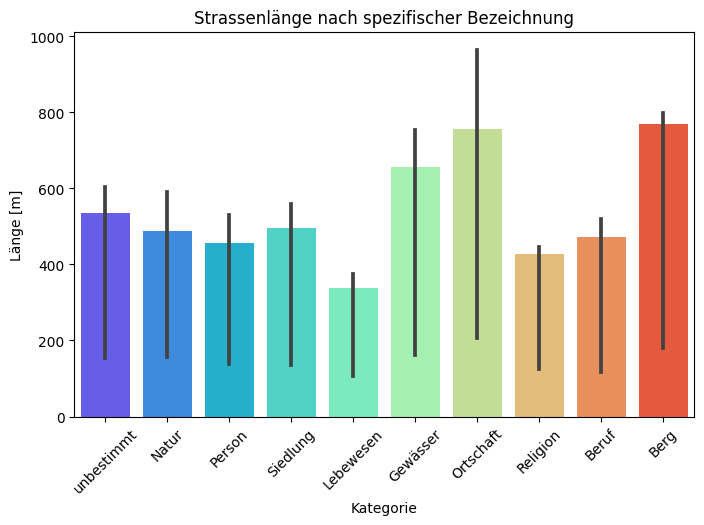

In [133]:
plt.figure(figsize=(8,5))
merge_all_de_fr.loc[merge_all_de_fr['classif'] == 'Andere', 'classif'] = 'unbestimmt'
sns.barplot(x='classif',y='LENGTH',data=merge_all_de_fr, palette='rainbow', estimator = 'mean', errorbar=('pi', 50))
plt.title("Strassenlänge nach spezifischer Bezeichnung")
plt.xlabel("Kategorie")
plt.xticks(rotation=45)
plt.ylabel("Länge [m]")
plt.show()

In [139]:
warnings.filterwarnings("ignore")
merge_all_de_fr.groupby('classif').mean() 

,STR_ESID,COM_FOSNR,STR_EASTING,STR_NORTHING,LENGTH
classif,,,,,
Berg,1.011791e+07,2371.968604,2.666378e+06,1.229195e+06,769.733870
Beruf,1.011438e+07,2842.681682,2.648879e+06,1.224662e+06,472.711686
Gewässer,1.012519e+07,2329.925645,2.674112e+06,1.233073e+06,656.137085
Lebewesen,1.011230e+07,2983.024355,2.641037e+06,1.220096e+06,337.980007
Natur,1.012656e+07,2188.248936,2.668253e+06,1.233362e+06,486.925887
Ortschaft,1.011745e+07,3308.213541,2.624166e+06,1.204837e+06,757.127427
Person,1.012522e+07,3386.992609,2.633293e+06,1.205346e+06,457.001608
Religion,1.011303e+07,3326.962517,2.636884e+06,1.210813e+06,427.657412
Siedlung,1.011869e+07,2900.530733,2.649629e+06,1.220610e+06,496.438799


## Statistics per canton

Text(0.5, 0, 'Kanton')

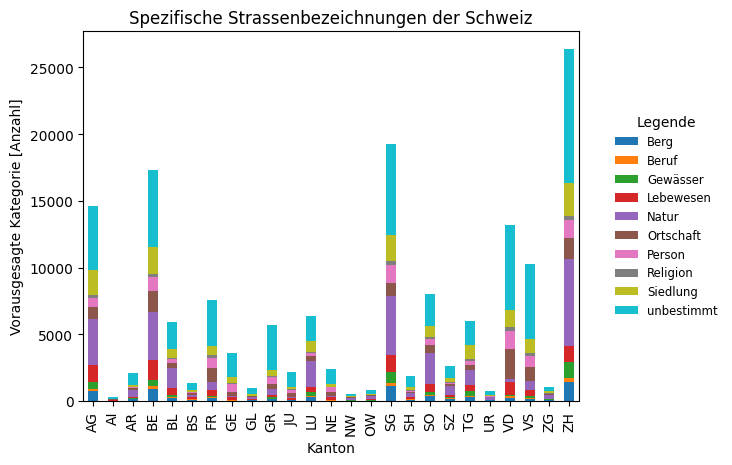

In [140]:
df2 = merge_all_de_fr[['COM_CANTON','classif']]
df2 = df2.groupby(['COM_CANTON', 'classif']).size()


df2 = df2.unstack(level=-1, fill_value=0)
df2.plot.bar(stacked=True).legend(
    loc='right', 
    ncol=1, title="Legende", 
    bbox_to_anchor=(1.3, 0.5),
    fontsize='small',               
    edgecolor='none',
)
plt.title("Spezifische Strassenbezeichnungen der Schweiz")
plt.ylabel("Vorausgesagte Kategorie [Anzahl]")
plt.xlabel("Kanton")

Text(0.5, 0, 'Kanton')

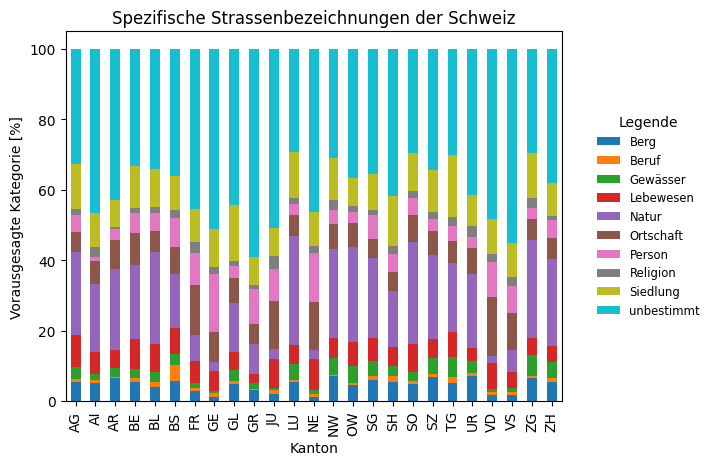

In [141]:
df2 = merge_all_de_fr[['COM_CANTON','classif']]
df2 = df2.groupby(['COM_CANTON', 'classif']).size()
df2 = df2.unstack(level=-1, fill_value=0)
stacked_data = df2.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot.bar(stacked=True).legend(
    loc='right', 
    ncol=1, title="Legende", 
    bbox_to_anchor=(1.3, 0.5),
    fontsize='small',               
    edgecolor='none',
)
plt.title("Spezifische Strassenbezeichnungen der Schweiz")
plt.ylabel("Vorausgesagte Kategorie [%]")
plt.xlabel("Kanton")

In [142]:
streetnames['STR_TERMS'] = streetnames['STR_TERMS'].replace(['allée', 'gassa', 'rue$', 'ruelle$', 'strässli'],
                                                            ['allee', 'gasse', 'rue', 'ruelle', 'strasse'])

In [144]:
colors = {
    'allee': '#01665e',
    'chemin': '#cab2d6',
    'gasse': '#1f78b4',
    'impasse': '#e31a1c',
    'platz': '#35978f',
    'route': '#fb9a99',
    'rue': '#b2df8a',
    'ruelle': '#33a02c',
    'strada': '#ffff33',
    'strasse': '#a6cee3',
    'veia': '#f1b6da',
    'via': '#fee08b',
    'vietta': '#762a83',
    'voa': '#c51b7d',
    'voia': '#8c510a',
    'wäg': '#ff7f00',
    'weg': '#fdbf6f',
    'other': '#d9d9d9',
}

Text(0.5, 0, 'Kanton')

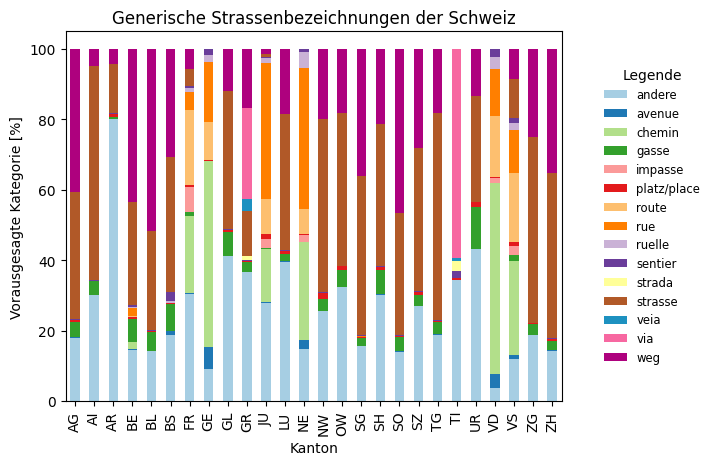

In [145]:
warnings.filterwarnings("ignore")

df3 = merge_all[['COM_CANTON','STR_TERMS']]
df3['STR_TERMS'] = df3['STR_TERMS'].replace(['gässli', 'piazza', 'place', 'platz', 'voa', 'vietta', 'voia', 'wegli', 'wäg', 'viale', 'boulevard', 'quai', 'allee', 'promenade', 'steg', 'passage'],
                                            ['gasse', 'platz/place', 'platz/place', 'platz/place', 'veia', 'veia', 'veia', 'weg', 'weg', 'veia', 'avenue', 'avenue', 'avenue', 'sentier', 'sentier', 'ruelle'])
df3["STR_TERMS"] = df3["STR_TERMS"].fillna('andere')
df3 = df3.groupby(['COM_CANTON', 'STR_TERMS']).size()
df3 = df3.unstack(level=-1, fill_value=0)
stacked_data = df3.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot.bar(stacked=True, color=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928', '#1d91c0', '#f768a1', '#ae017e']).legend(
    loc='right', 
    ncol=1, title="Legende", 
    bbox_to_anchor=(1.3, 0.5),
    fontsize='small',               
    edgecolor='none',
)
plt.title("Generische Strassenbezeichnungen der Schweiz")
plt.ylabel("Vorausgesagte Kategorie [%]")
plt.xlabel("Kanton")

C:\Users\micha\AppData\Local\Temp\ipykernel_284\2183974531.py:1: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merge_all, x="STR_EASTING", y="STR_NORTHING", cmap="Blues", shade=True, shade_lowest=False)
C:\Users\micha\AppData\Local\Temp\ipykernel_284\2183974531.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=merge_all, x="STR_EASTING", y="STR_NORTHING", cmap="Blues", shade=True, shade_lowest=False)


<AxesSubplot: xlabel='STR_EASTING', ylabel='STR_NORTHING'>

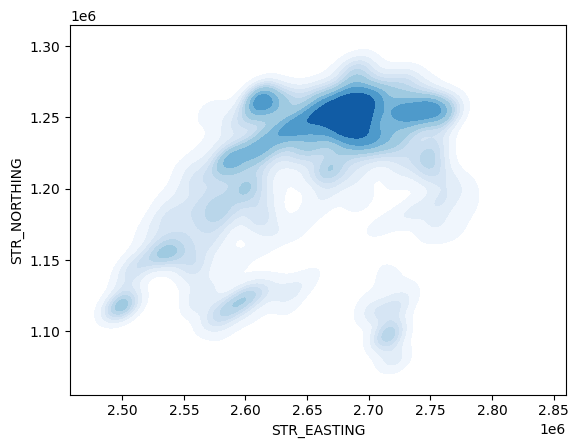

In [29]:
warnings.filterwarnings("ignore")

sns.kdeplot(data=merge_all, x="STR_EASTING", y="STR_NORTHING", cmap="Blues", shade=True, shade_lowest=False)

<AxesSubplot: xlabel='STR_EASTING', ylabel='STR_NORTHING'>

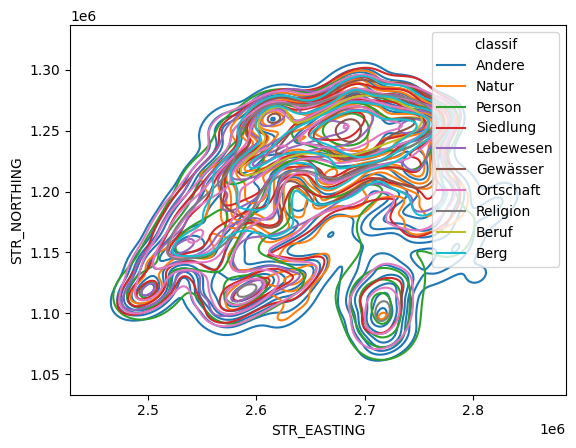

In [7]:
sns.kdeplot(data=merge_all, x="STR_EASTING", y="STR_NORTHING", hue="classif")

In [28]:
#bounds for Zurich
xmin =2680728
xmax =2685960
ymin =1245584
ymax =1249858

#[xmin:xmax, ymin:ymax]

In [33]:
zh = merge_all[(merge_all.STR_EASTING > xmin) & (merge_all.STR_EASTING < xmax) &
         (merge_all.STR_NORTHING > ymin) & (merge_all.STR_NORTHING < ymax)]

In [77]:
natur = merge_all[merge_all.classif == 'Natur']

Text(0.5, 1.0, 'Person')

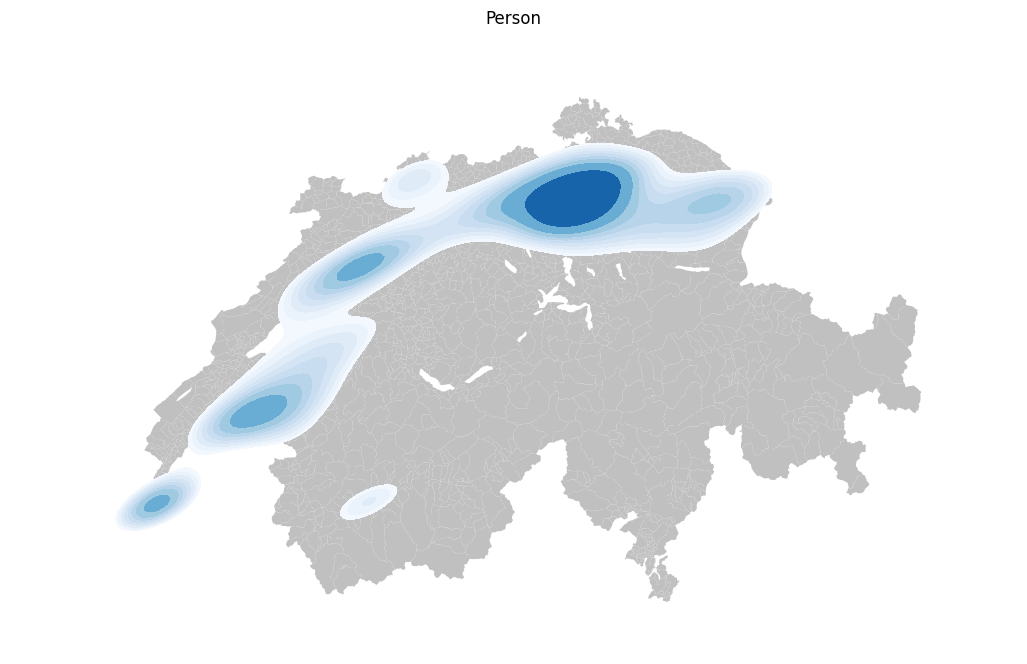

In [162]:
ax = com_geom.plot(figsize=(13,13), color = 'silver')

person = merge_all_de_fr[merge_all_de_fr.classif == 'Person']

sns.kdeplot(data=person, 
             x="STR_EASTING", 
             y="STR_NORTHING", 
             cmap="Blues", 
             shade=True, 
             shade_lowest=False,
             #clip=com_geom,
             thresh = 0.5,
             ax=ax
            )

plt.axis('off')
plt.title('Person')

Text(0.5, 1.0, 'Ortschaft')

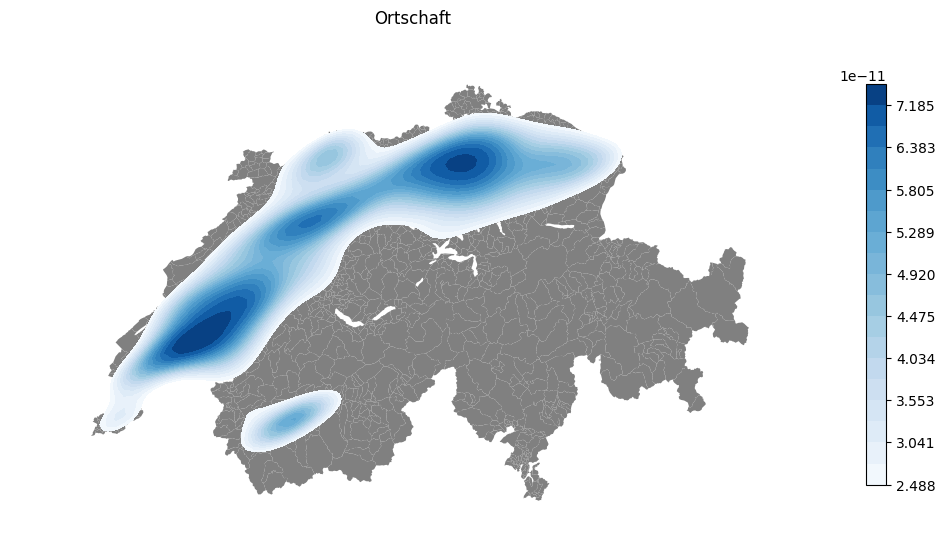

In [225]:
ax = com_geom.plot(figsize=(13,13), color = 'gray')

ortschaft = merge_all_de_fr[merge_all_de_fr.classif == 'Ortschaft']

sns.kdeplot(data=ortschaft, 
             x="STR_EASTING", 
             y="STR_NORTHING", 
             cmap="Blues", 
             shade=True, 
             shade_lowest=False,
             #clip=com_geom,
             thresh = 0.3,
            gridsize = 100,
            legend = True,
             ax=ax,
            levels = 20,
            cbar = True,
            cbar_kws = {'shrink': 0.4}
            
      
            
            )

plt.axis('off')
plt.title("Ortschaft")

Text(0.5, 1.0, 'Natur')

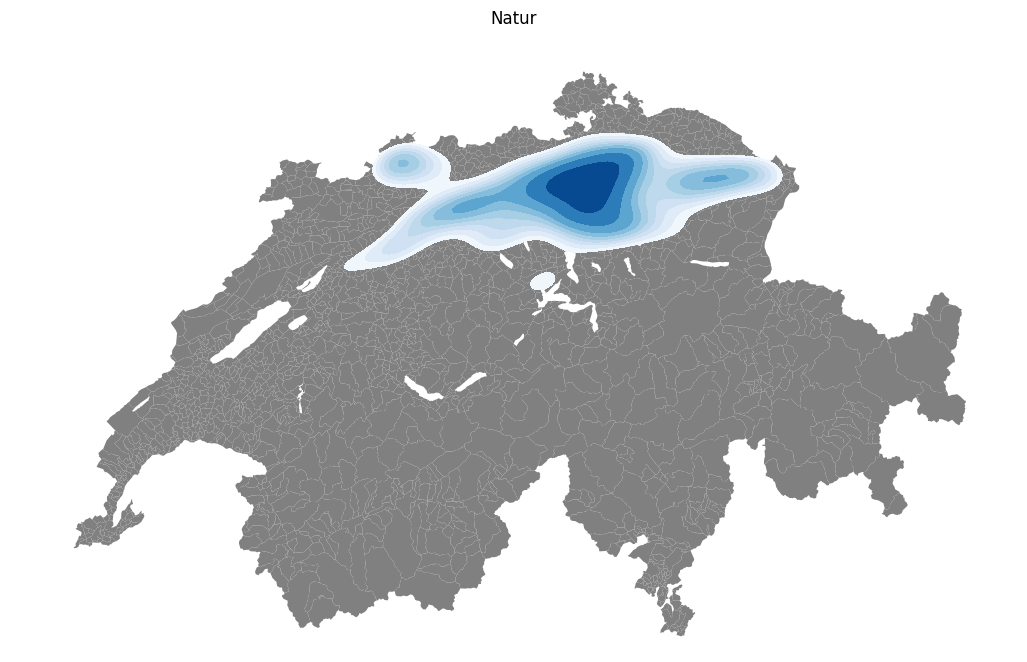

In [158]:
ax = com_geom.plot(figsize=(13,13), color = 'grey')

natur = merge_all_de_fr[merge_all_de_fr.classif == 'Natur']

sns.kdeplot(data=natur, 
             x="STR_EASTING", 
             y="STR_NORTHING", 
             cmap="Blues", 
             shade=True, 
             shade_lowest=False,
             #clip=com_geom,
             thresh = 0.5,
             ax=ax
            )

plt.axis('off')
plt.title("Natur")

Text(0.5, 1.0, 'Beruf')

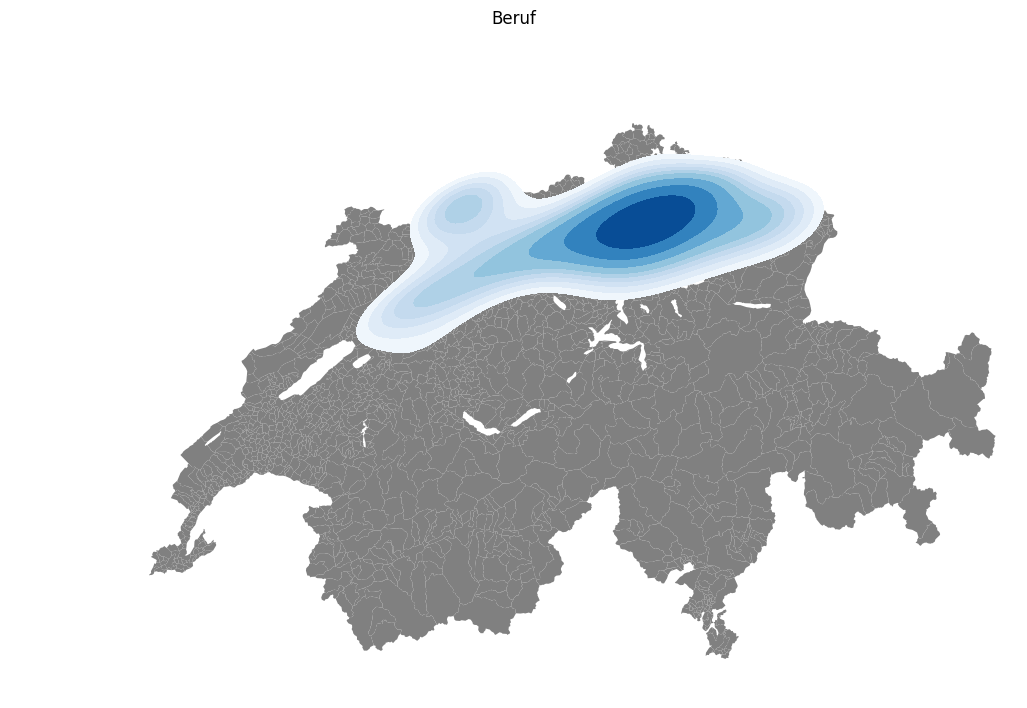

In [157]:
ax = com_geom.plot(figsize=(13,13), color = 'grey')

beruf = merge_all_de_fr[merge_all_de_fr.classif == 'Beruf']

sns.kdeplot(data=beruf, 
             x="STR_EASTING", 
             y="STR_NORTHING", 
             cmap="Blues", 
             shade=True, 
             shade_lowest=False,
             #clip=com_geom,
             thresh = 0.5,
             ax=ax
            )

plt.axis('off')
plt.title("Beruf")

Text(0.5, 1.0, 'Lebewesen')

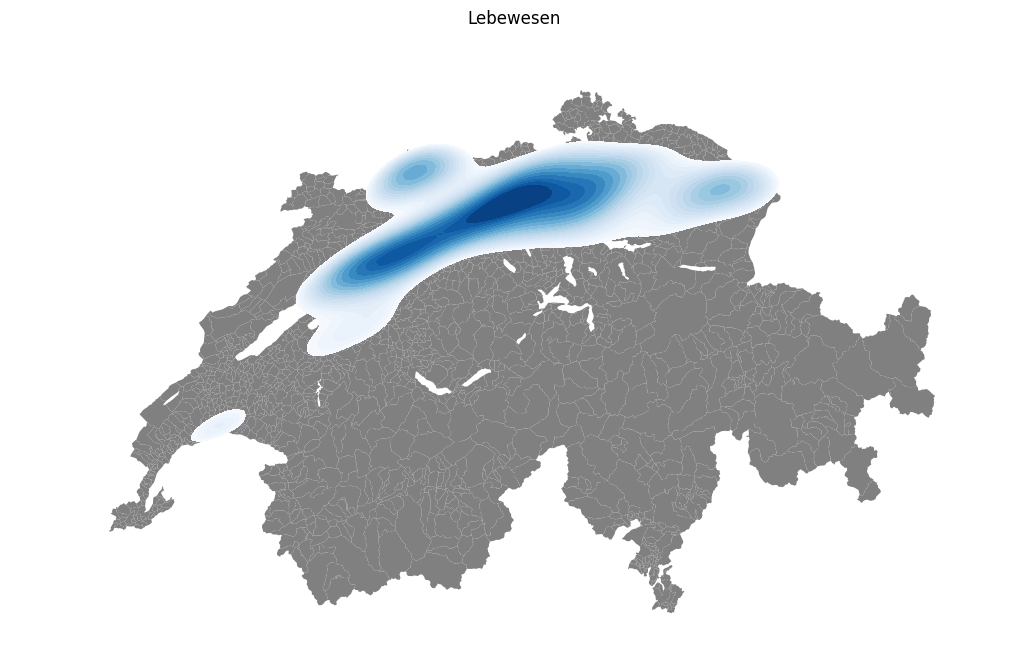

In [226]:
ax = com_geom.plot(figsize=(13,13), color = 'grey')

lebewesen = merge_all_de_fr[merge_all_de_fr.classif == 'Lebewesen']

sns.kdeplot(data=lebewesen, 
             x="STR_EASTING", 
             y="STR_NORTHING", 
             cmap="Blues", 
             shade=True, 
             shade_lowest=False,
             #clip=com_geom,
             thresh = 0.5,
             ax=ax
            )

plt.axis('off')
plt.title("Lebewesen")

Text(0.5, 1.0, 'Title')

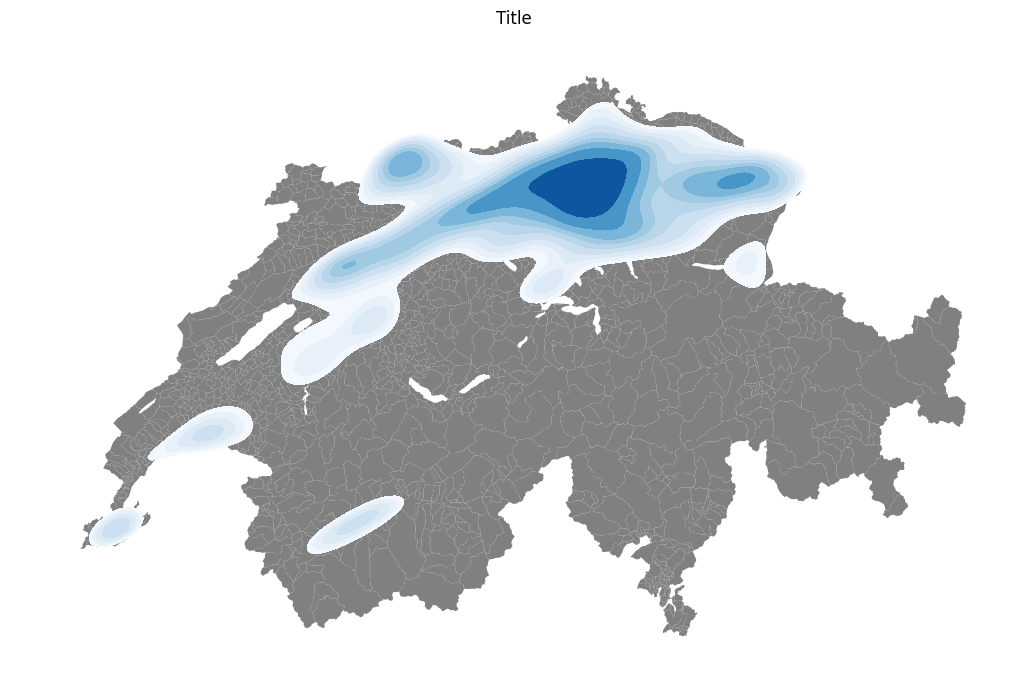

In [228]:
ax = com_geom.plot(figsize=(13,13), color = 'grey')

sns.kdeplot(data=merge_all_de_fr, 
             x="STR_EASTING", 
             y="STR_NORTHING", 
             cmap="Blues", 
             shade=True, 
             shade_lowest=False,
             #clip=com_geom,
             thresh = 0.4,
             ax=ax
            )

plt.axis('off')
plt.title("Title")

Text(0.5, 1.0, 'Title')

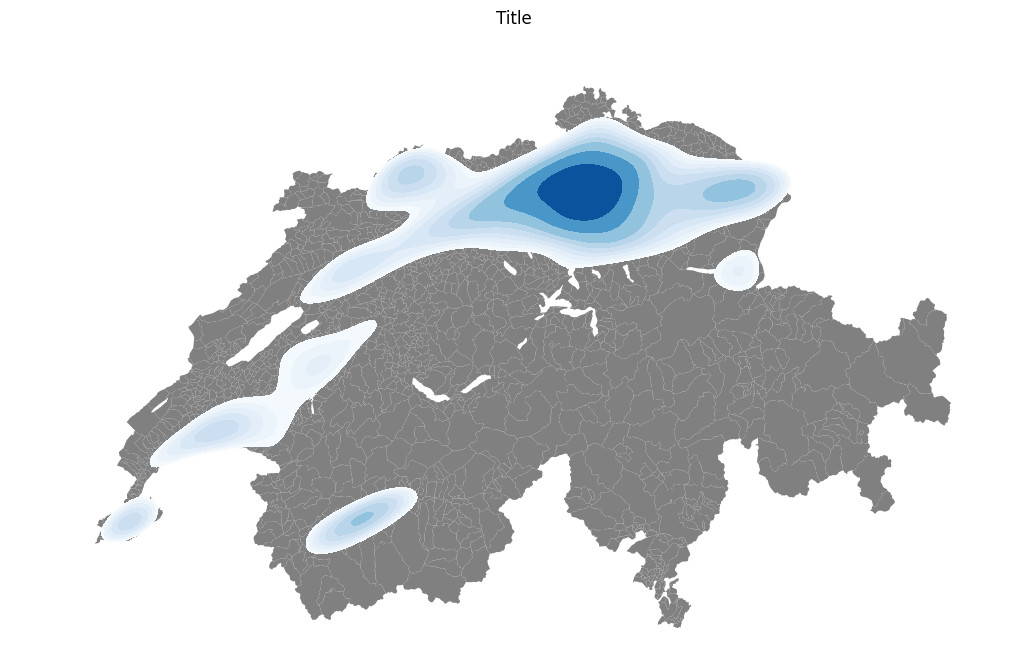

In [161]:
ax = com_geom.plot(figsize=(13,13), color = 'grey')

unbestimmt = merge_all_de_fr[merge_all_de_fr.classif == 'unbestimmt']

sns.kdeplot(data=unbestimmt, 
             x="STR_EASTING", 
             y="STR_NORTHING", 
             cmap="Blues", 
             shade=True, 
             shade_lowest=False,
             #clip=com_geom,
             thresh = 0.5,
             ax=ax
            )

plt.axis('off')
plt.title("unbestimmt")